In [1]:
# Import libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Path to files
# https://www.kaggle.com/usdot/flight-delays
airlines_path = "./archive/airlines.csv"
airport_path = "./archive/airports.csv"
flights_path = "./archive/flights.csv"

# Load data
airlines_data = pd.read_csv(airlines_path)
airport_data = pd.read_csv(airport_path)
flights_data = pd.read_csv(flights_path)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
airlines_data

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [ ]:
airport_data.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [ ]:
# Airports without lat/lon
airport_data.isnull().sum()
airport_data[airport_data.isnull().any(axis=1)]

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
96,ECP,Northwest Florida Beaches International Airport,Panama City,FL,USA,NaN,NaN
234,PBG,Plattsburgh International Airport,Plattsburgh,NY,USA,NaN,NaN
313,UST,Northeast Florida Regional Airport (St. August...,St. Augustine,FL,USA,NaN,NaN


In [ ]:
flights_data.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
plt.style.use('seaborn')

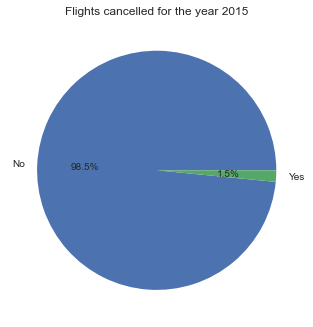

In [8]:
labels = ['No', 'Yes']
plt.pie(x=flights_data.groupby('CANCELLED').count()['FLIGHT_NUMBER'], autopct='%1.1f%%',labels=labels)
plt.title("Flights cancelled for the year 2015")
plt.show()

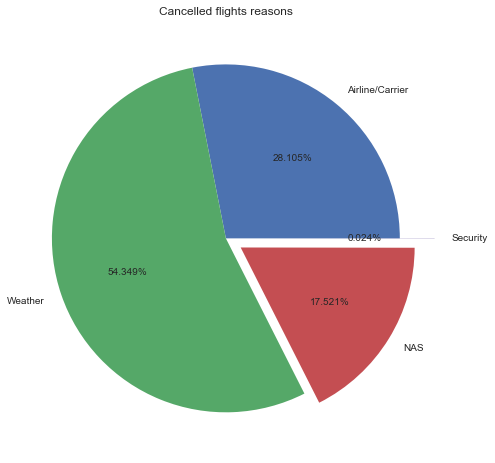

In [44]:
labels = ['Airline/Carrier', 'Weather', 'NAS', 'Security']
plt.figure(figsize=(15,8))
plt.pie(x=flights_cancelled.groupby('CANCELLATION_REASON').count()['FLIGHT_NUMBER'], autopct='%1.3f%%',labels=labels,  explode = (0,0,0.1,0.2))
plt.title("Cancelled flights reasons in 2015")
plt.show()

In [7]:
flights_data.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

In [8]:
# print the percentage null values in columns
def get_null_data(data):
    
    '''Function prints the % of nulls in null columns.'''
    
    total_rows = data.shape[0]
    print("==== TOTAL NUMBER OF ROWS : {} ====".format(total_rows))
    print()
    for col in data.columns:
        null_values = data[col].isnull().sum()
        if null_values > 0:
            perc_null_val = float(null_values)*100/total_rows
            print("{} column has {:.2f}% null values".format(col, perc_null_val))
            

# Call the function
get_null_data(flights_data)

==== TOTAL NUMBER OF ROWS : 5819079 ====

TAIL_NUMBER column has 0.25% null values
DEPARTURE_TIME column has 1.48% null values
DEPARTURE_DELAY column has 1.48% null values
TAXI_OUT column has 1.53% null values
WHEELS_OFF column has 1.53% null values
SCHEDULED_TIME column has 0.00% null values
ELAPSED_TIME column has 1.81% null values
AIR_TIME column has 1.81% null values
WHEELS_ON column has 1.59% null values
TAXI_IN column has 1.59% null values
ARRIVAL_TIME column has 1.59% null values
ARRIVAL_DELAY column has 1.81% null values
CANCELLATION_REASON column has 98.46% null values
AIR_SYSTEM_DELAY column has 81.72% null values
SECURITY_DELAY column has 81.72% null values
AIRLINE_DELAY column has 81.72% null values
LATE_AIRCRAFT_DELAY column has 81.72% null values
WEATHER_DELAY column has 81.72% null values


We will drop columns with over 80% of null values

In [11]:
columns_to_drop = ['CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
flights_data.drop(columns_to_drop, axis=1, inplace=True)

KeyError: "['CANCELLATION_REASON' 'AIR_SYSTEM_DELAY' 'SECURITY_DELAY' 'AIRLINE_DELAY'\n 'LATE_AIRCRAFT_DELAY' 'WEATHER_DELAY'] not found in axis"

In [12]:
# Drop the rest of the null rows

'''
Since, rest of the null values are very lest ~2%, it is better to drop these rows. 
But still to be sure, we can check the information loss.
'''

rows_after_dropping_null = flights_data.dropna(axis=0).shape[0]
rows_before_dropping_null = flights_data.shape[0]

perc_info_loss = (rows_before_dropping_null - rows_after_dropping_null)*100/rows_before_dropping_null
print("Percentage information loss after dropping null values is {:.3f}%".format(perc_info_loss))

Percentage information loss after dropping null values is 1.806%


In [13]:
flights_data.dropna(axis=0, inplace=True)

In [14]:
# Check null values again
get_null_data(flights_data)

==== TOTAL NUMBER OF ROWS : 5714008 ====



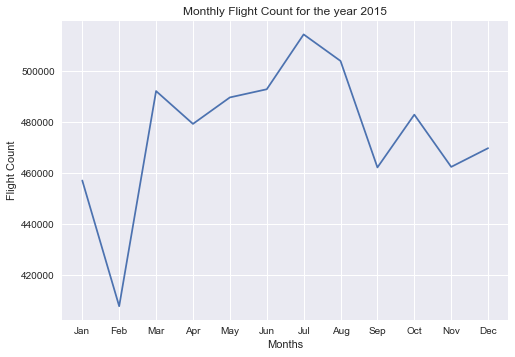

In [15]:
# plot the monthly data
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
flights_data.groupby('MONTH').count()['FLIGHT_NUMBER'].plot()
plt.xlabel("Months")
plt.xticks(labels=labels, ticks=np.arange(1,13,1))
plt.ylabel("Flight Count")
plt.title("Monthly Flight Count for the year 2015")
plt.show()

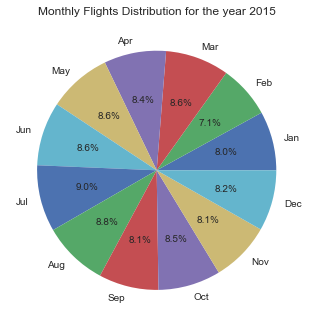

In [16]:
# plot the month distribution on a pie chart
plt.pie(x=flights_data.groupby('MONTH').count()['FLIGHT_NUMBER'], autopct='%1.1f%%', labels=labels)
plt.title("Monthly Flights Distribution for the year 2015")
plt.show()

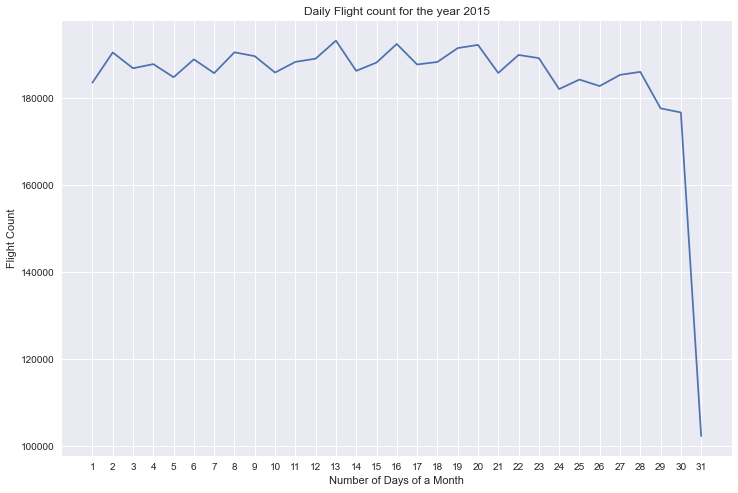

In [17]:
# Plot the daily flight data for the year 2015
flights_data.groupby('DAY').count()['AIRLINE'].plot(figsize=(12,8))
plt.xlabel("Number of Days of a Month")
plt.xticks(np.arange(1, 32, 1))
plt.ylabel("Flight Count")
plt.title("Daily Flight count for the year 2015")
plt.show()

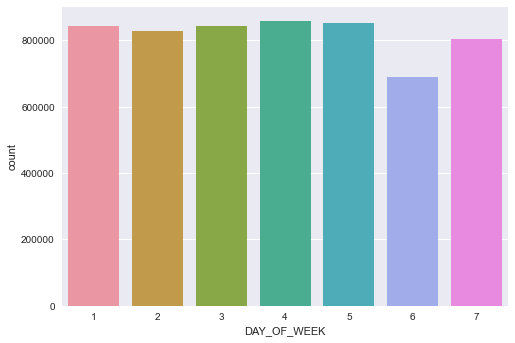

In [18]:
# plot the distribution of flights across DAY_OF_WEEK
sns.countplot(data=flights_data, x='DAY_OF_WEEK')
plt.show()

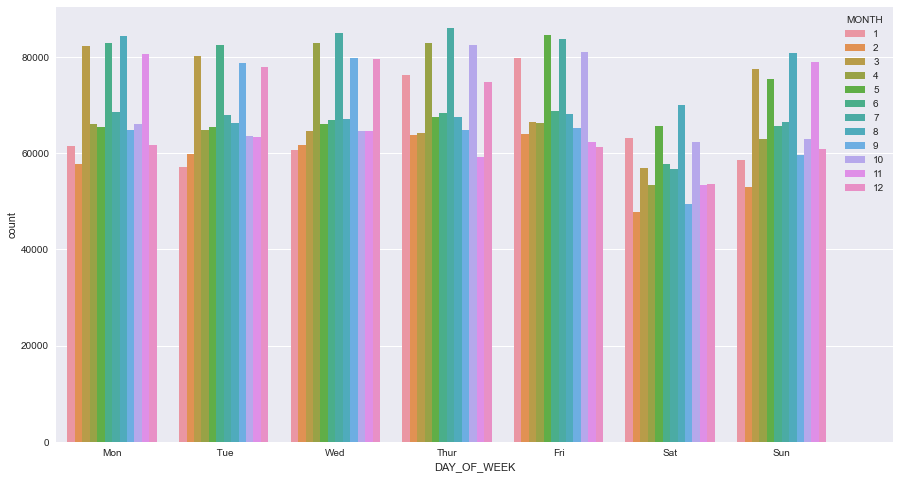

In [19]:
# plot the distribution of flights across DAY_OF_WEEK for each Month
day_labels = ['Mon',' Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun', '']
plt.figure(figsize=(15,8))
sns.countplot(data=flights_data, x='DAY_OF_WEEK', hue='MONTH')
plt.xticks(labels=day_labels, ticks=np.arange(0,8,1))
plt.show()

In [20]:
# Merge flights_data with airlines_data
flights_data = pd.merge(left = flights_data, right = airlines_data, left_on='AIRLINE', right_on='IATA_CODE').rename(columns={'AIRLINE_y' : 'AIRLINE'})

In [21]:
flights_data.drop('AIRLINE_x', axis=1, inplace=True)

In [22]:
flights_data.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,IATA_CODE,AIRLINE
0,2015,1,1,4,98,N407AS,ANC,SEA,5,2354.0,...,1448,404.0,4.0,430,408.0,-22.0,0,0,AS,Alaska Airlines Inc.
1,2015,1,1,4,135,N527AS,SEA,ANC,25,24.0,...,1448,254.0,5.0,320,259.0,-21.0,0,0,AS,Alaska Airlines Inc.
2,2015,1,1,4,108,N309AS,ANC,SEA,45,41.0,...,1448,451.0,4.0,509,455.0,-14.0,0,0,AS,Alaska Airlines Inc.
3,2015,1,1,4,122,N413AS,ANC,PDX,50,46.0,...,1542,504.0,3.0,525,507.0,-18.0,0,0,AS,Alaska Airlines Inc.
4,2015,1,1,4,130,N457AS,FAI,SEA,115,107.0,...,1533,538.0,7.0,548,545.0,-3.0,0,0,AS,Alaska Airlines Inc.


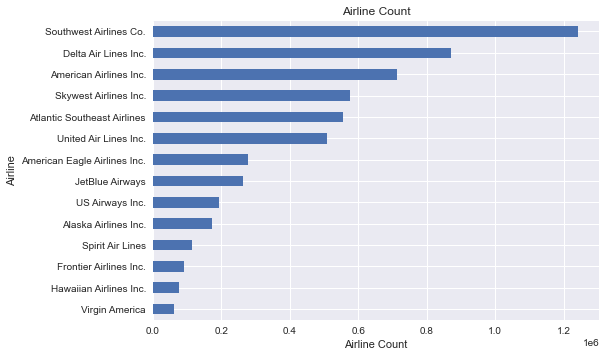

In [23]:
# Plot the AIRLINE count distribution
flights_data['AIRLINE'].value_counts().sort_values().plot(kind='barh')
plt.ylabel("Airline")
plt.xlabel("Airline Count")
plt.title("Airline Count")
plt.show()

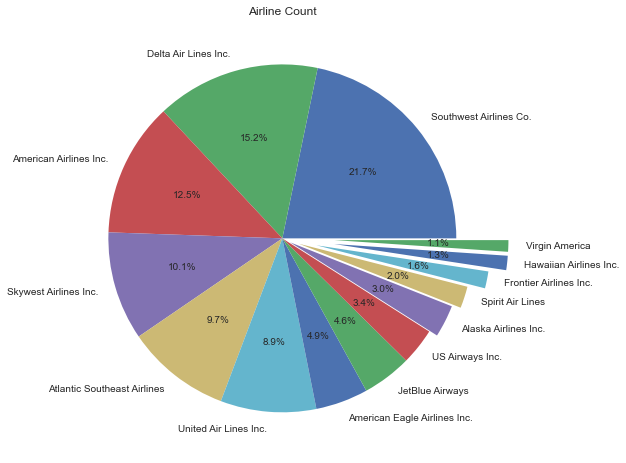

In [24]:
airlines_labels = list(flights_data['AIRLINE'].value_counts().index)
plt.figure(figsize=(15,8))
plt.pie(flights_data['AIRLINE'].value_counts(), autopct = '%1.1f%%', labels = airlines_labels, explode = (0,0,0,0,0,0,0,0,0,0.05,0.1,0.2,0.3,0.3))
plt.title("Airline Count")
plt.show()

In [25]:
# Print the most flying airline with the total number of fligths in the year 2015
most_flying_airline = flights_data['AIRLINE'].value_counts().index[0]
max_flights = flights_data['AIRLINE'].value_counts().iloc[0]

print("The airlines with most number of flights in the year 2015 is {}".format(most_flying_airline))
print("Maximum flights in the year 2015 are {:,}".format(max_flights))

The airlines with most number of flights in the year 2015 is Southwest Airlines Co.
Maximum flights in the year 2015 are 1,242,403


In [26]:
# Plot the ORIGIN AIRPORT count
flights_data.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,IATA_CODE,AIRLINE
0,2015,1,1,4,98,N407AS,ANC,SEA,5,2354.0,...,1448,404.0,4.0,430,408.0,-22.0,0,0,AS,Alaska Airlines Inc.
1,2015,1,1,4,135,N527AS,SEA,ANC,25,24.0,...,1448,254.0,5.0,320,259.0,-21.0,0,0,AS,Alaska Airlines Inc.
2,2015,1,1,4,108,N309AS,ANC,SEA,45,41.0,...,1448,451.0,4.0,509,455.0,-14.0,0,0,AS,Alaska Airlines Inc.
3,2015,1,1,4,122,N413AS,ANC,PDX,50,46.0,...,1542,504.0,3.0,525,507.0,-18.0,0,0,AS,Alaska Airlines Inc.
4,2015,1,1,4,130,N457AS,FAI,SEA,115,107.0,...,1533,538.0,7.0,548,545.0,-3.0,0,0,AS,Alaska Airlines Inc.


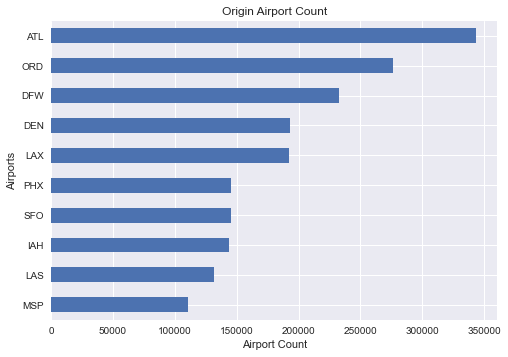

In [27]:
# Plot top 10 'ORIGIN AIRPORTS' on the basis of count
flights_data['ORIGIN_AIRPORT'].value_counts().sort_values().iloc[-10:].plot(kind='barh')
plt.xlabel("Airport Count")
plt.ylabel("Airports")
plt.title("Origin Airport Count")
plt.show()

In [28]:
# Top 10 ORIGIN AIRPORTS on the basis of count
top_10_origin_airports = flights_data['ORIGIN_AIRPORT'].value_counts().sort_values().iloc[-10:].index

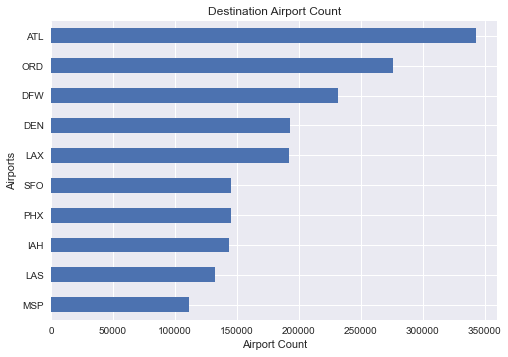

In [29]:
# Plot top 10 'DESTINATION AIRPORTS' on the basis of count
flights_data['DESTINATION_AIRPORT'].value_counts().sort_values().iloc[-10:].plot(kind='barh')
plt.xlabel("Airport Count")
plt.ylabel("Airports")
plt.title("Destination Airport Count")
plt.show()

In [30]:
# Top 10 DESTINATION AIRPORTS on the basis of count
top_10_destination_airports = flights_data['DESTINATION_AIRPORT'].value_counts().sort_values().iloc[-10:].index

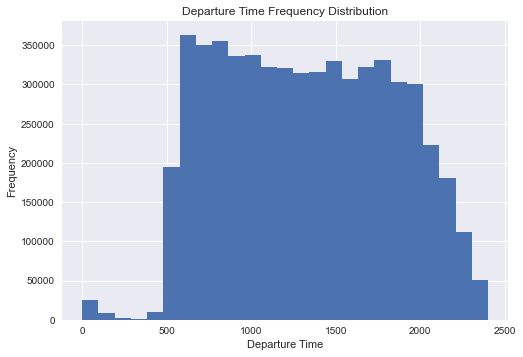

In [31]:
flights_data['DEPARTURE_TIME'].hist(bins=25)
plt.xlabel("Departure Time")
plt.ylabel("Frequency")
plt.title("Departure Time Frequency Distribution")
plt.show()

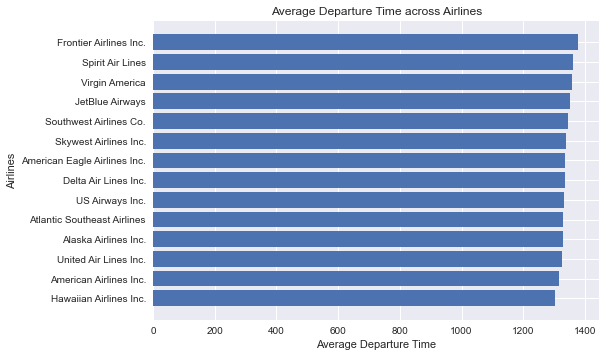

In [32]:
# Plot DEPARTURE_TIME across airlines
dep_data = flights_data.groupby('AIRLINE').mean()['DEPARTURE_TIME'].sort_values()

plt.barh(y = dep_data.index, width = dep_data.values)
plt.xlabel("Average Departure Time")
plt.ylabel("Airlines")
plt.title("Average Departure Time across Airlines")
plt.show()

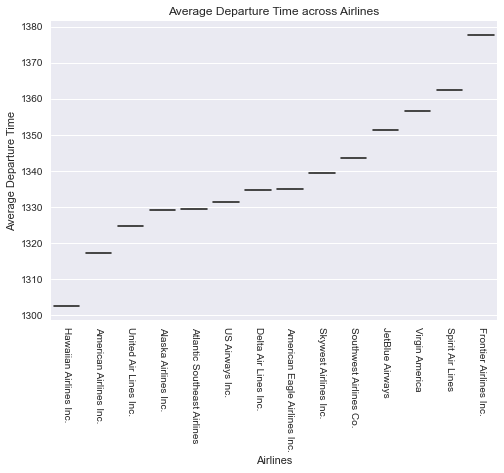

In [33]:
sns.boxplot(x = dep_data.index, y = dep_data.values)
plt.xlabel("Airlines")
plt.ylabel("Average Departure Time")
plt.xticks(rotation=-90)
plt.title("Average Departure Time across Airlines")
plt.show()

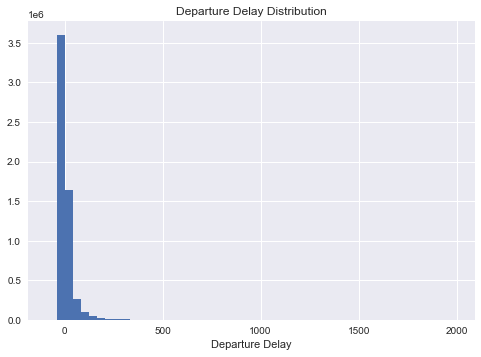

In [34]:
# Plot the DEPARTURE_DELAY distribution
plt.hist(flights_data['DEPARTURE_DELAY'], bins=50)
plt.xlabel("Departure Delay")
plt.title("Departure Delay Distribution")
plt.show()

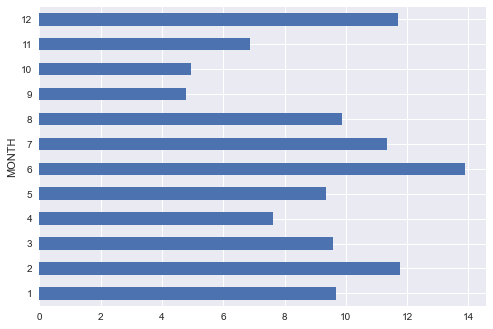

In [37]:
# Plot DEPARTURE_DELAY across months
flights_data.groupby('MONTH').mean()['DEPARTURE_DELAY'].plot(kind='barh')
plt.show()

Month of June has the maximum average departure delay time.

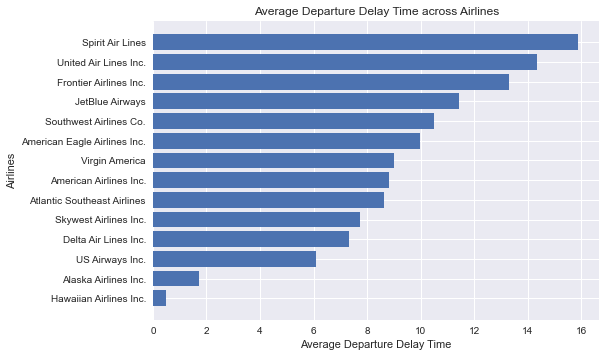

In [39]:
# Plot DEPARTURE_DELAY time across airlines
dep_data = flights_data.groupby('AIRLINE').mean()['DEPARTURE_DELAY'].sort_values()

plt.barh(y = dep_data.index, width = dep_data.values)
plt.xlabel("Average Departure Delay Time")
plt.ylabel("Airlines")
plt.title("Average Departure Delay Time across Airlines")
plt.show()

Spirit Airlines has the maximum average departure delay time.

Hawaiian Airlines Inc has the minimum average departure delay time.

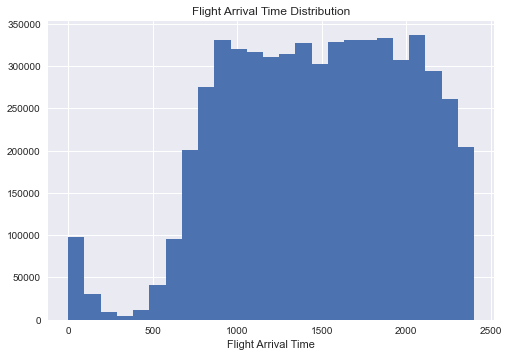

In [40]:
# ARRIVAL_TIME Distribution
plt.hist(flights_data['ARRIVAL_TIME'], bins=25)
plt.xlabel("Flight Arrival Time")
plt.title("Flight Arrival Time Distribution")
plt.show()

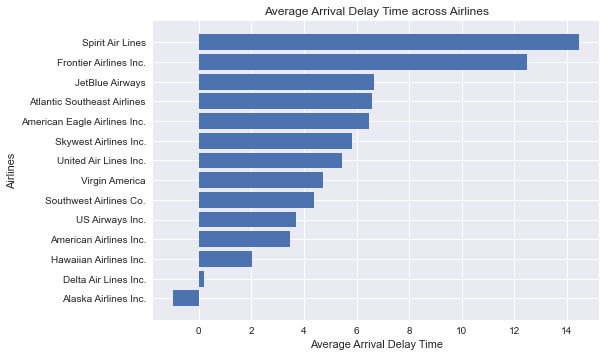

In [41]:
# Plot ARRIVAL_DELAY time across airlines
dep_data = flights_data.groupby('AIRLINE').mean()['ARRIVAL_DELAY'].sort_values()

plt.barh(y = dep_data.index, width = dep_data.values)
plt.xlabel("Average Arrival Delay Time")
plt.ylabel("Airlines")
plt.title("Average Arrival Delay Time across Airlines")
plt.show()

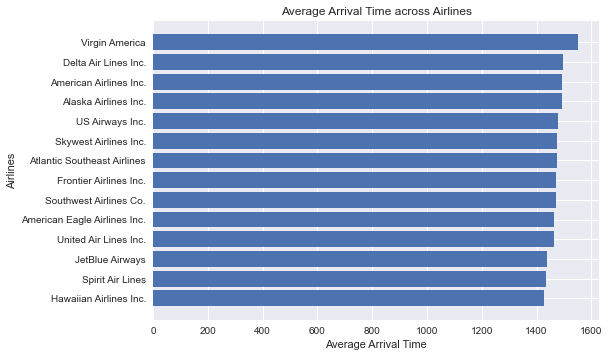

In [42]:
# Plot DEPARTURE_DELAY time across airlines
dep_data = flights_data.groupby('AIRLINE').mean()['ARRIVAL_TIME'].sort_values()

plt.barh(y = dep_data.index, width = dep_data.values)
plt.xlabel("Average Arrival Time")
plt.ylabel("Airlines")
plt.title("Average Arrival Time across Airlines")
plt.show()


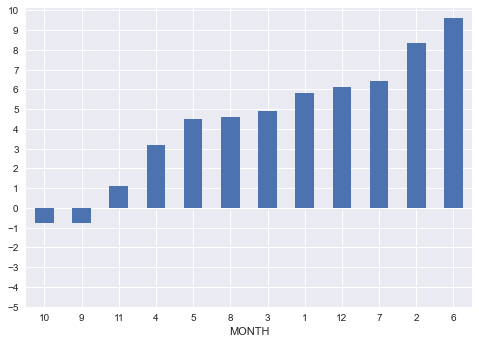

In [43]:
# Plot ARRIVAL_DELAY across months
flights_data.groupby('MONTH').mean()['ARRIVAL_DELAY'].sort_values().plot(kind='bar')
plt.yticks(np.arange(-5,11,1))
plt.xticks(rotation=0)
plt.show()

Months of September and October have an average of arrival time in negative. That means flights on an average used to arrive before the scheduled time in these 2 months

In [44]:
flights_data['DIVERTED'].value_counts()

0    5714008
Name: DIVERTED, dtype: int64

In [45]:
flights_data['CANCELLED'].value_counts()

0    5714008
Name: CANCELLED, dtype: int64

No flight has been diverted or cancelled in the year 2015

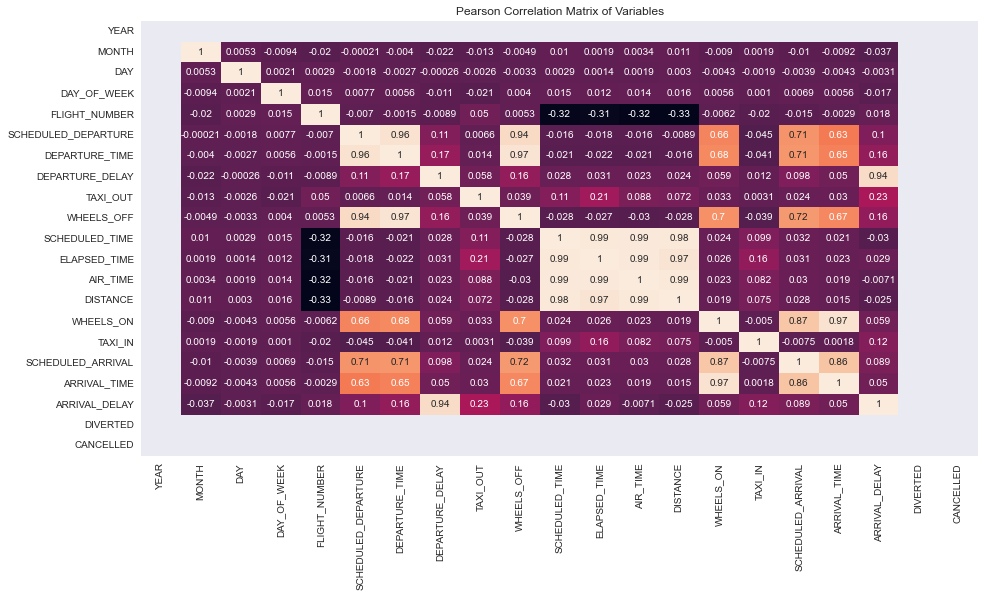

In [47]:
# plot the correlation matrix
corr_matrix = flights_data.corr(method='pearson')
plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix, annot=True, cbar=False)
plt.title("Pearson Correlation Matrix of Variables")
plt.show()

In [48]:
# plot the correlation matrix
corr_matrix = flights_data.corr(method="kendall")
plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix, annot=True, cbar=False)
plt.title("Kendall Correlation Matrix of Variables")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:4812: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


KeyboardInterrupt: 

In [ ]:
# plot the correlation matrix
corr_matrix = flights_data.corr(method="spearman")
plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix, annot=True, cbar=False)
plt.title("Spearman Correlation Matrix of Variables")
plt.show()